Linear Model:

  - Mean Score: 0.886888
  - Accuracy: 0.892818
  - Precision: 0.513514
  - Recall: 0.193878
  - F1 Score: 0.281481


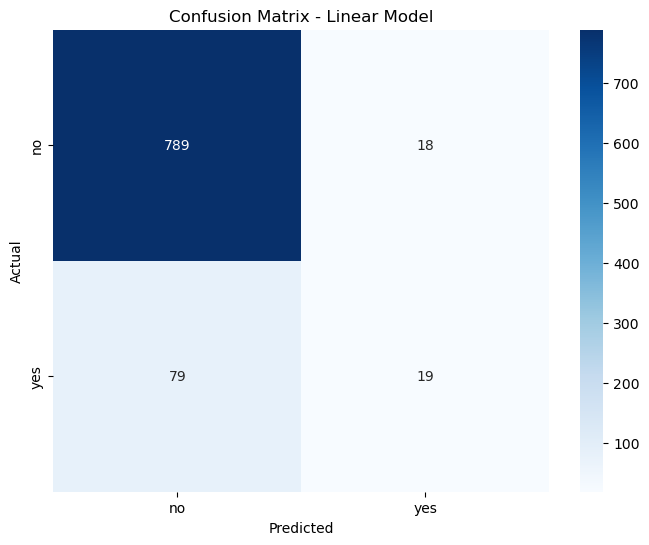

Logit Model:

  - Mean Score: 0.887442
  - Accuracy: 0.893923
  - Precision: 0.527778
  - Recall: 0.193878
  - F1 Score: 0.283582


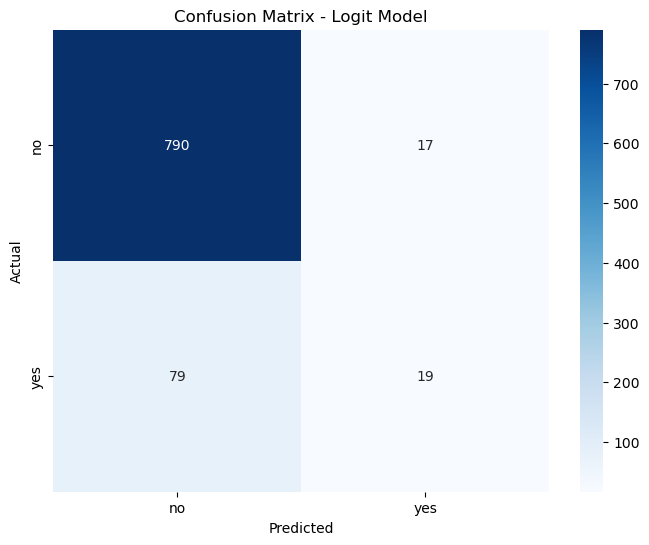

Decision Tree:

  - Mean Score: 0.844577
  - Accuracy: 0.840884
  - Precision: 0.294643
  - Recall: 0.336735
  - F1 Score: 0.314286


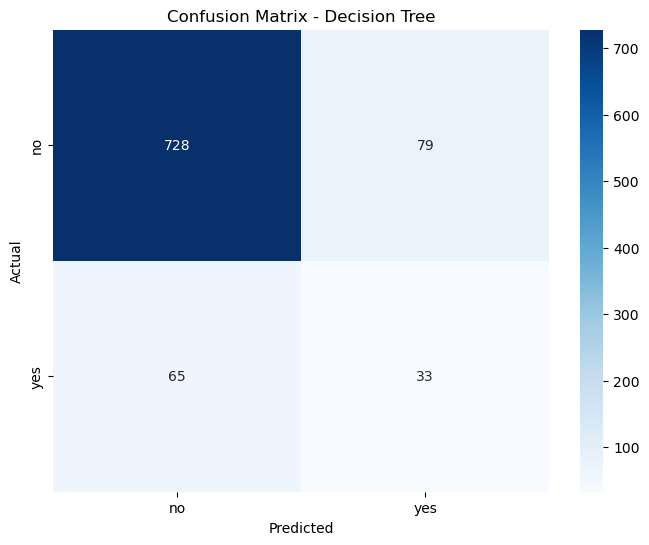

KNN:

  - Mean Score: 0.880807
  - Accuracy: 0.893923
  - Precision: 0.515152
  - Recall: 0.346939
  - F1 Score: 0.414634


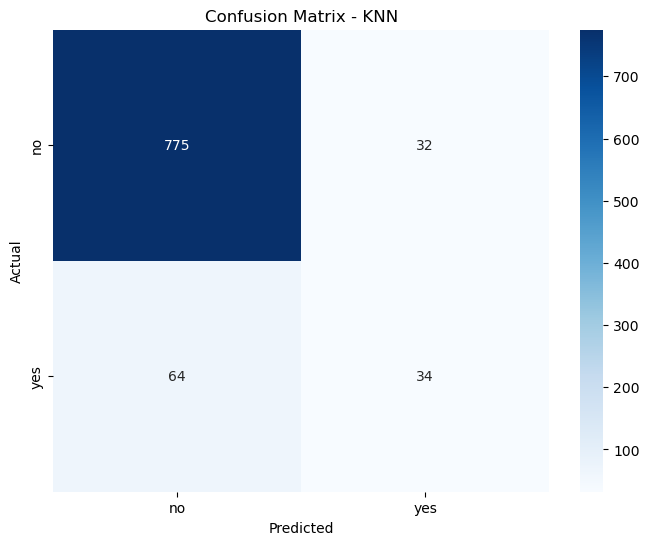

SVM:

  - Mean Score: 0.887162
  - Accuracy: 0.889503
  - Precision: 0.472222
  - Recall: 0.173469
  - F1 Score: 0.253731


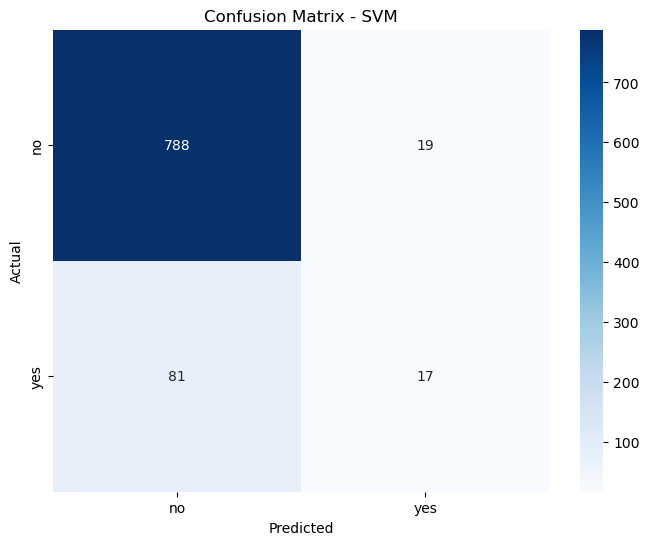

Best Model: Logit Model with Mean Score: 0.887442


In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset with semicolon delimiter
data = pd.read_csv('Bank.csv', sep=';')

# Use the 'replace' function to map 'no' to 0 and 'yes' to 1 in the 'loan' column
data['loan'] = data['loan'].replace({'no': 0, 'yes': 1})

# Use the 'replace' function to map 'single' to 0, 'married' to 1, and 'divorced' to 2 in the 'marital' column
data['marital'] = data['marital'].replace({'single': 0, 'married': 1, 'divorced': 2})

# Convert 'education' to numeric values using LabelEncoder
le = LabelEncoder()
data['education'] = le.fit_transform(data['education'])

# Map 'no' to 0 and 'yes' to 1 in the 'default' column
data['default'] = data['default'].map({'no': 0, 'yes': 1})

# Map 'no' to 0 and 'yes' to 1 in the 'housing' column
data['housing'] = data['housing'].map({'no': 0, 'yes': 1})

# Select relevant features
features = ['marital', 'education', 'default', 'housing', 'loan', 'duration', 'campaign', 'pdays']

X = data[features]
y = data['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

warnings.filterwarnings("ignore")

# Define a list of models to evaluate
models = []
models.append(('Linear Model', LogisticRegression()))
models.append(('Logit Model', LogisticRegression(max_iter=2000)))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))

# Evaluate and compare models
best_model = None
best_score = 0
results = []

for model_name, model in models:
    kfold = KFold(n_splits=10, shuffle=False)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    mean_score = cv_results.mean()
    
    if mean_score > best_score:
        best_model = model_name
        best_score = mean_score

    model.fit(X_train, y_train)  # Fit the model on the entire training data
    y_pred = model.predict(X_test)  # Predict on the test data
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Map 'no' to 0 and 'yes' to 1 in the target variable for precision calculation
    y_test_binary = y_test.map({'no': 0, 'yes': 1})
    y_pred_binary = pd.Series(y_pred).map({'no': 0, 'yes': 1})
    
    precision = precision_score(y_test_binary, y_pred_binary)
    recall = recall_score(y_test_binary, y_pred_binary)
    f1 = f1_score(y_test_binary, y_pred_binary)
    
    bold_text = "\033[1m"  # ANSI escape code for bold text
    reset_text = "\033[0m"  # ANSI escape code to reset text style to normal

    
    # Create a formatted message with bold headings
    msg = bold_text + f"{model_name}:\n" + reset_text
    msg += f"\n  - Mean Score: {mean_score:.6f}\n"
    msg += bold_text + f"  - Accuracy: {accuracy:.6f}\n" + reset_text
    msg += f"  - Precision: {precision:.6f}\n"
    msg += f"  - Recall: {recall:.6f}\n"
    msg += f"  - F1 Score: {f1:.6f}"
    print(msg)

    # Plot the confusion matrix using Seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['no', 'yes'], yticklabels=['no', 'yes'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

print(bold_text + f"Best Model: {best_model} with Mean Score: {best_score:.6f}" + reset_text)
